In [1]:
using divand
using PyPlot
using NCDatasets
using DataStructures

## Data
### Analysis 

In [2]:
analysisfile = joinpath("../Water_body_Salinity.4Danl.nc")
if isfile(analysisfile)
    info("File already exists") 
else
    error("File does not exist")
end

INFO: File already exists


## Observations

In [5]:
observationfile = "../Salinity.bigfile"
if !isfile(observationfile)
    download("https://b2drop.eudat.eu/s/Bv9Fj0YGC0zp2vn/download", observationfile)
else
    info("Data file already downloaded")
end

INFO: Data file already downloaded


## Reading
### Analysis

In [6]:
ds = Dataset(analysisfile)
reslon = ds["lon"];
reslat = ds["lat"];
resdepth = ds["depth"];
restime = ds["time"];
resval = ds["Salinity"];

### Observations

In [7]:
obsval,obslon,obslat,obsdepth,obstime,obsid = loadbigfile(observationfile);

## Selection

In [8]:
depthplot = 50.;
timeindex = 3;

### Analysis

In [9]:
depthindex = find(resdepth .== depthplot)[1];
resval2plot = resval[:, :, depthindex, timeindex].data;

# Replace fill value by NaN's
fill_value = resval.attrib["_FillValue"]
resval2plot[resval2plot .== fill_value] = NaN;

### Observations

In [10]:
depthindex = (obsdepth .== depthplot);

139230-element BitArray{1}:
 false
 false
 false
 false
 false
 false
 false
 false
  true
 false
 false
 false
 false
     ⋮
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
  true

In [11]:
obslon = obslon[depthindex];
obslat = obslat[depthindex];
obsval = obsval[depthindex];
obsdepth = obsdepth[depthindex];

## Plot
We set commmon limits for the colors.

In [12]:
vmin=18.0;
vmax=20.5;

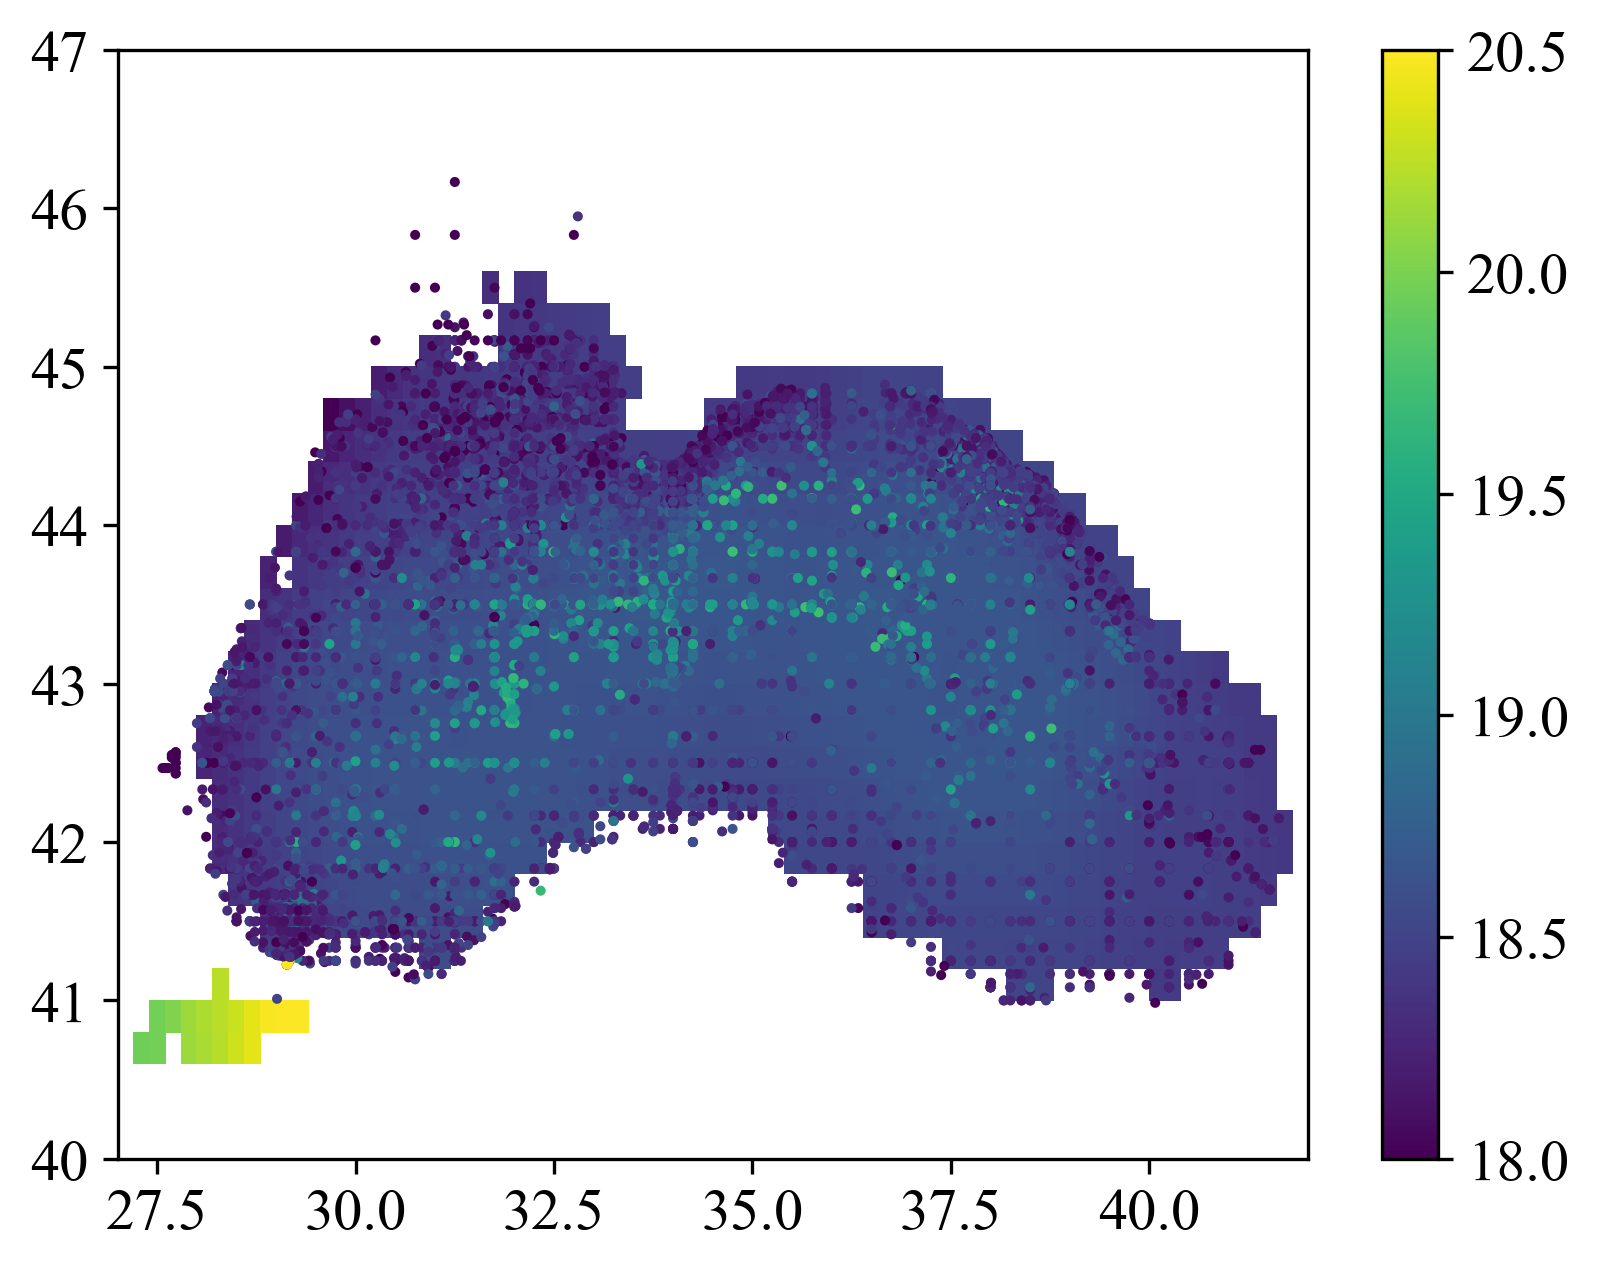

In [15]:
figure()
pcolormesh(reslon, reslat, transpose(resval2plot));
scatter(obslon, obslat, c=obsval, s=2; edgecolors="face");
colorbar()
clim(vmin,vmax)